**Необходимые импорты**

In [520]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

**Задача 1: Решение методом квадратур**

In [521]:
h = 0.1
a = 0
b = 1 + 0.001
lam = 0.5

In [522]:
kernel = lambda x, s: x * s * lam
function = lambda x: 5 / 6 * x
function_gt = lambda x: x

In [523]:
def quadrature_method(kernel, function,
                      x, h):
    n = len(x)
    
    w_t = 0.5
    w_j = 1
    
    A = np.zeros((n, n))
    B = np.zeros((n, 1))
    
    for i in range(n):
        A[i][0] = -h * w_t * kernel(x[i], x[0])
        for j in range(1, n - 1):
            A[i][j] = -h * w_j * kernel(x[i], x[j])
        A[i][n - 1] = -h * w_t * kernel(x[i], x[n - 1])
        A[i][i] = A[i][i] + 1
    
    for j in range(n):
        B[j][0] = function(x[j])
    
    return np.linalg.solve(A, B)

In [524]:
x = np.arange(a, b, h)
x = x.reshape(len(x), 1)

y_gt = []
for i in range(len(x)):
    y_gt.append([])
    y_gt[i].append(function_gt(x[i]))
y_gt = np.array(y_gt).reshape(len(x), 1)

C:\Users\zhukz\AppData\Local\Temp\ipykernel_13748\3460676915.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  A[i][0] = -h * w_t * kernel(x[i], x[0])
C:\Users\zhukz\AppData\Local\Temp\ipykernel_13748\3460676915.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  A[i][j] = -h * w_j * kernel(x[i], x[j])
C:\Users\zhukz\AppData\Local\Temp\ipykernel_13748\3460676915.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  A[i][n - 1] = -h * w_t * kernel(x[i], x[n - 1])

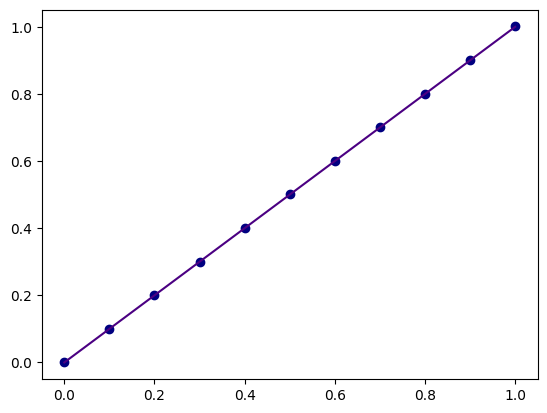

In [525]:
y_quadrature = quadrature_method(kernel, function, x, h)

plt.plot(x, y_gt, 'indigo')
plt.scatter(x, y_quadrature, c='navy')
plt.show()

**Задача 2: Решение методом вырожденных ядер**

In [526]:
a = 0
b = 1 + 0.001
h = 0.05
lam = -1

In [527]:
function = lambda t: np.exp(t) - t
function_gt = lambda t: 1

In [528]:
def degenerate_kernel(a, b, function, t, lam):
    alpha = lambda t: [-t, t, t ** 2, t ** 3, t ** 4]
    beta = lambda t: [1, 1, t, 0.5 * t ** 2, 1 / 6 * t ** 3]

    beta_func = lambda t, m, f: beta(t)[m] * f(t)
    A_ij_func = lambda t, m, k: beta(t)[m] * alpha(t)[k]
    
    m = len(alpha(0))
    M = np.zeros((m, m))
    r = np.zeros((m, 1))
    
    for i in range(m):
        r[i] = integrate.quad(beta_func, a, b, args=(i, function))[0]
        for j in range(m):
            M[i][j] = -lam * integrate.quad(A_ij_func, a, b, args=(i, j))[0]
    
    for i in range(m):
        M[i][i] = M[i][i] + 1
    
    c = np.linalg.solve(M, r)
    a_ij = np.array(alpha(t))
    
    return lam * np.sum(c[:, np.newaxis] * a_ij, axis=0) + function(t)

In [529]:
x = np.arange(a, b, h)
x = x.reshape(len(x), 1)

y_gt = []
for i in range(len(x)):
    y_gt.append([])
    y_gt[i].append(function_gt(x[i]))
y_gt = np.array(y_gt).reshape(len(x), 1)

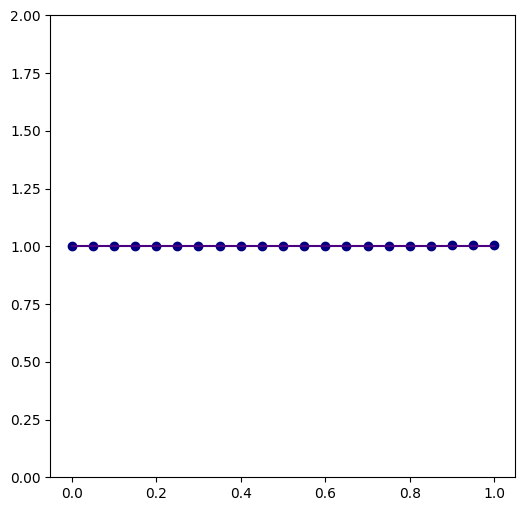

In [530]:
y_degenerate = degenerate_kernel(a, b, function, x, lam)

plt.figure(figsize=(6, 6))
plt.plot(x, y_gt, 'indigo')
plt.scatter(x, y_degenerate, c='navy')
plt.ylim((0, 2))
plt.show()

**Задача 3: Решение методом Петрова-Галеркина**

In [531]:
a = np.zeros([2, 2])
b = np.zeros(2)
lam = 1

In [532]:
phi = [lambda x: x,
       lambda x: x ** 2]
psi = [lambda x: 1,
       lambda x: x]
kernel = lambda x, s: x ** 2 + x * s

function = lambda x: 1
function_gt = lambda x: 1 + 6 * x ** 2

In [533]:
def petrov_galerkin(a, b, phi, psi, kernel, function, lam):
    for i in range(2):
        b[i] = lam * integrate.quad(lambda x: psi[i](x) * 
                                    integrate.quad(lambda s: kernel(x, s) * function(s),
                                                   -1.001, 1.001)[0],
                                    -1.001, 1.001)[0]
        for j in range(2):
            a[i][j] = integrate.quad(lambda x : phi[i](x) * psi[j](x), -1.001, 1.001)[0] - \
                lam * integrate.quad(lambda x: psi[i](x) * 
                                     integrate.quad(lambda s: kernel(x, s) * phi[j](s),
                                                    -1.001, 1.001)[0],
                                     -1.001, 1.001)[0]
    return a, b

In [534]:
x = np.linspace(-1, 1, 21)

y_gt = []
for i in range(len(x)):
    y_gt.append([])
    y_gt[i].append(function_gt(x[i]))
y_gt = np.array(y_gt).reshape(len(x), 1)

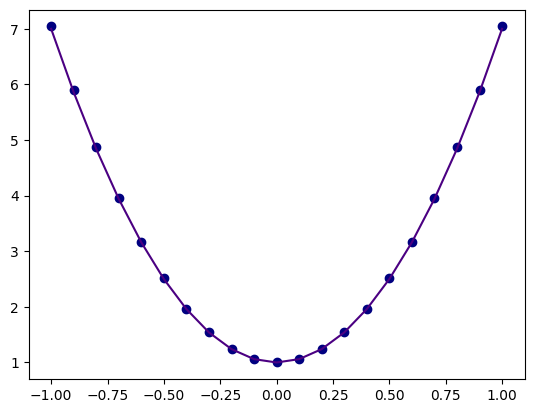

In [535]:
a, b = petrov_galerkin(a, b, phi, psi, kernel, function, lam)
c = np.linalg.solve(a, b)
y_petrov_galerkin = 1 + c[0] * phi[0](x) + c[1] * phi[1](x)

plt.plot(x, y_gt, 'indigo')
plt.scatter(x, y_petrov_galerkin, c='navy')
plt.show()